In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Обработка числовых пропусков

In [4]:
df = pd.read_csv('HousingData.csv')

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
total_count = df.shape[0]

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt =='int64') :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CRIM. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка ZN. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка INDUS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка CHAS. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка AGE. Тип данных float64. Количество пустых значений 20, 3.95%.
Колонка LSTAT. Тип данных float64. Количество пустых значений 20, 3.95%.


In [8]:
df_num = df[num_cols]
df_num

,CRIM,ZN,INDUS,CHAS,AGE,LSTAT
0,0.00632,18.0,2.31,0.0,65.2,4.98
1,0.02731,0.0,7.07,0.0,78.9,9.14
2,0.02729,0.0,7.07,0.0,61.1,4.03
3,0.03237,0.0,2.18,0.0,45.8,2.94
4,0.06905,0.0,2.18,0.0,54.2,NaN
...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,69.1,NaN
502,0.04527,0.0,11.93,0.0,76.7,9.08
503,0.06076,0.0,11.93,0.0,91.0,5.64
504,0.10959,0.0,11.93,0.0,89.3,6.48


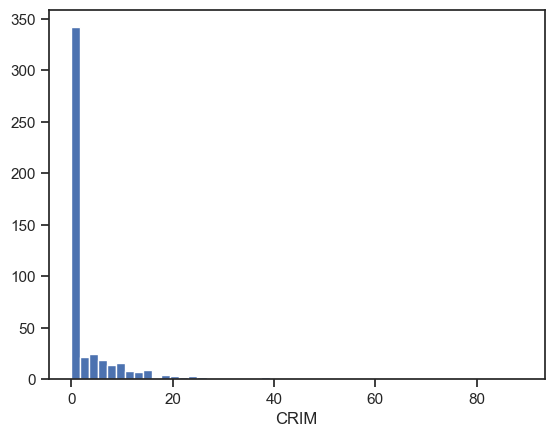

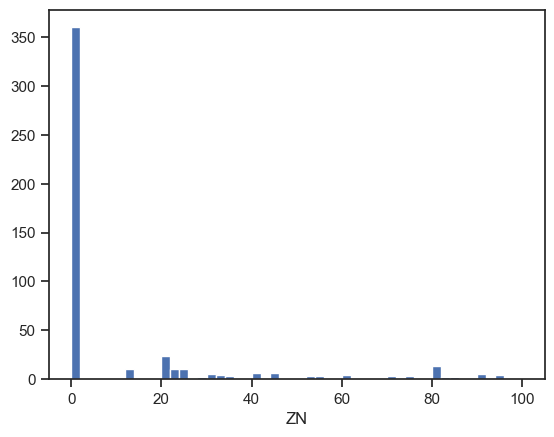

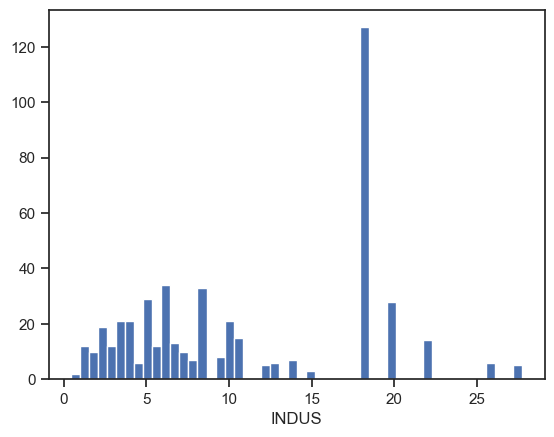

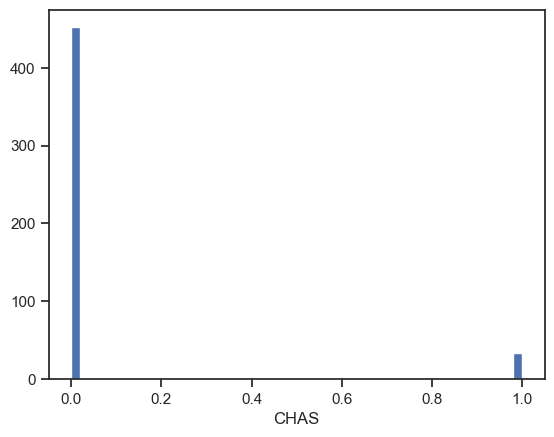

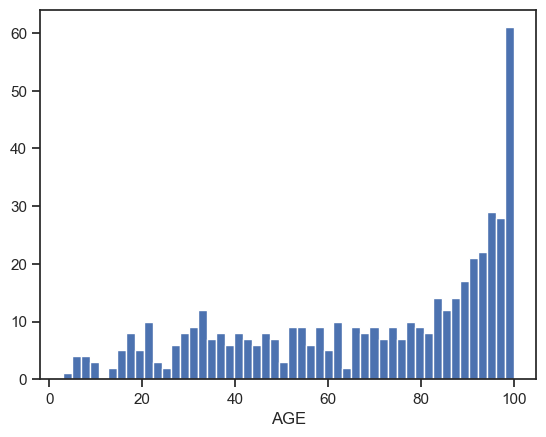

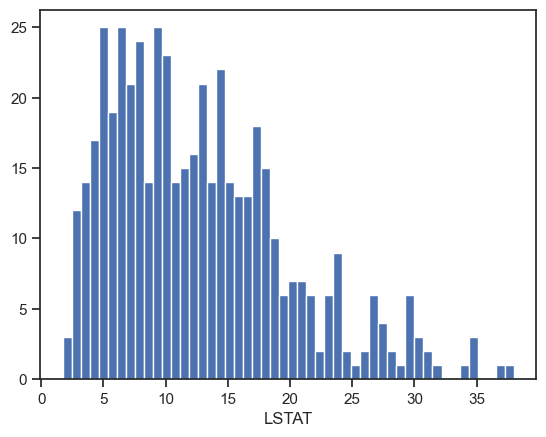

In [9]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [21]:
data_num_crim = df_num[['CRIM']]
data_num_crim.head()

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905


In [22]:
#Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()#где были пропуски и чем их заменили 
mask_missing_values_only = indicator.fit_transform(data_num_crim)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Обработаем пропуски в столбце CRIM, заметим, что большая часть данных сконцентрированы в одной части, что наталкивает нас на мысль о том, что данные в стратегиях будут одинаковыми.

In [23]:
strategies=['mean', 'median', 'most_frequent'] 
#какими значениями будем заполнять 

In [24]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_age)#заполнение пропусков
    return data_num_imp[mask_missing_values_only]

In [25]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([ 21.4,  88.2,  95.6,  30.8,  26.3,  34.1,  21.4,  76.5,  65.1,
         91.5,  45.6,  18.4,  96.8,  92.6,  94.7, 100. ,  59.7,  86.1,
         90. ,  48.2]))

In [26]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([ 21.4,  88.2,  95.6,  30.8,  26.3,  34.1,  21.4,  76.5,  65.1,
         91.5,  45.6,  18.4,  96.8,  92.6,  94.7, 100. ,  59.7,  86.1,
         90. ,  48.2]))

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([ 21.4,  88.2,  95.6,  30.8,  26.3,  34.1,  21.4,  76.5,  65.1,
         91.5,  45.6,  18.4,  96.8,  92.6,  94.7, 100. ,  59.7,  86.1,
         90. ,  48.2]))

Заметим, что  данные распределены однотонно, применив методы заметим, что все три стратегии лежат рядом (те имеют одинаковое значение). Поэтому есть смысл заполнить пропуски в столбцах медианой или среднем значением.

In [32]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())

# Масштабирование данных

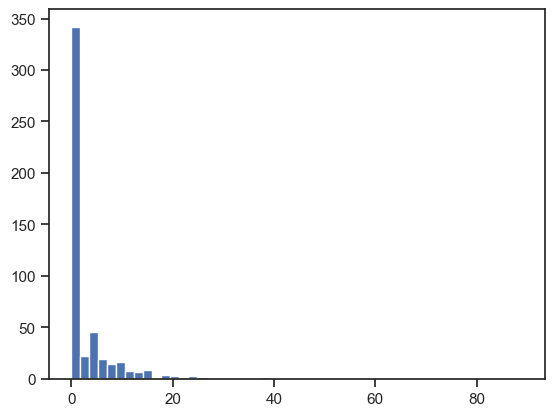

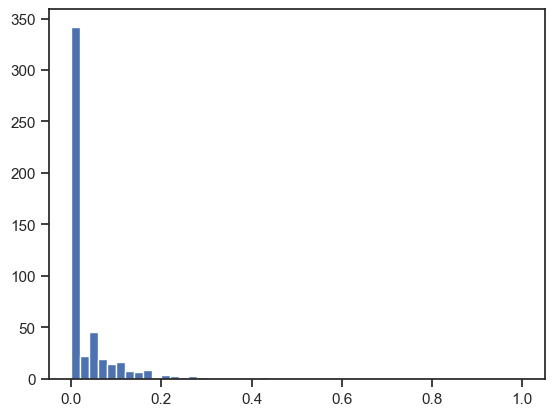

In [34]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['CRIM']])

plt.hist(df['CRIM'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

plt.show()

# Обработка категориальных пропусков

In [35]:
df = pd.read_csv('games.csv')

In [36]:
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and dt=='object' :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Name. Тип данных object. Количество пустых значений 2, 0.4%.
Колонка Genre. Тип данных object. Количество пустых значений 2, 0.4%.
Колонка User_Score. Тип данных object. Количество пустых значений 6701, 1324.31%.
Колонка Rating. Тип данных object. Количество пустых значений 6766, 1337.15%.


In [37]:
cat_temp_data = df[['Genre']]
cat_temp_data.head()

,Genre
0,Sports
1,Platform
2,Racing
3,Sports
4,Role-Playing


In [38]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ...,
       ['Adventure'],
       ['Platform'],
       ['Simulation']], dtype=object)

In [39]:
np.unique(data_imp2)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [40]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ...,
       ['Adventure'],
       ['Platform'],
       ['Simulation']], dtype=object)

In [41]:
np.unique(data_imp3)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'NA', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sports', 'Strategy'], dtype=object)

In [42]:
col = ['Action', 'Adventure', 'Fighting', 'Misc', 'NA', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sports', 'Strategy']
for i in col: 
    k = data_imp3[data_imp3==i].size
    print('Количество вхожденией по {} равно {}'.format(i, k))

Количество вхожденией по Action равно 3369
Количество вхожденией по Adventure равно 1303
Количество вхожденией по Fighting равно 849
Количество вхожденией по Misc равно 1750
Количество вхожденией по NA равно 2
Количество вхожденией по Platform равно 888
Количество вхожденией по Puzzle равно 580
Количество вхожденией по Racing равно 1249
Количество вхожденией по Role-Playing равно 1498
Количество вхожденией по Shooter равно 1323
Количество вхожденией по Simulation равно 873
Количество вхожденией по Sports равно 2348
Количество вхожденией по Strategy равно 683


Данные в столбце Genre заполнить часто встречающими значениями было бы нелогично, поэтому заполним данные константой

In [43]:
df['Genre']= df['Genre'].fillna('unk')

# Преобразование категориальных признаков в числовые

### Кодирование категорий наборами бинарных значений

In [48]:
cat_temp_df = df[['Rating']]
cat_temp_df.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(cat_temp_df)
df_imp2

cat_enc = pd.DataFrame({'c1':df_imp2.T[0]})
cat_enc

,c1
0,E
1,E
2,E
3,E
4,E
...,...
16710,E
16711,E
16712,E
16713,E


In [49]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(16715, 1)

In [50]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]])

In [51]:
pd.get_dummies(cat_enc).head()

,c1_AO,c1_E,c1_E10+,c1_EC,c1_K-A,c1_M,c1_RP,c1_T
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [52]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_nan
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0
